In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [2]:
df = pd.read_csv('../../data/data_p1.csv')
df.head()

,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,W_utility,B_utility,W_visits,B_visits,W_winrate,B_winrate
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,0.259317905 0.275272131 0.34262374 0.42036429 ...,0.269090086 0.368879974 0.313294873 0.32417401...,0.612279892 0.74496536 0.798256159 0.889255106...,0.659113407 1.01974392 0.845264435 0.903297544...,19.0972146 19.1262786 19.1251674 19.1245994 18...,18.9657594 18.7349877 19.0095144 19.3369429 19...,0.12718147 0.120274714 0.122864292 0.129893627...,0.123399746 0.14826827 0.121511509 0.136832864...,1 2 2 1 3 4 3 5 2 2 2 2 4 3 7 1 1 2 2 2 3 3 4 ...,1 1 3 1 7 3 4 2 2 1 2 3 1 2 2 4 4 1 1 1 2 1 1 ...,0.562697232 0.557953551 0.559613369 0.56364989...,0.56073527 0.57263428 0.559731811 0.567105129 ...
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,-0.336228907 -0.451985866 -0.450503439 -0.7391...,-0.195299417 -0.0215474814 -0.0487820767 -0.03...,-0.605065703 -0.531611502 -0.457107723 -1.0450...,-0.401197761 0.0677562729 -0.15006648 -0.24798...,18.9644117 19.1280327 19.729129 19.3076018 19....,18.9167735 18.8883766 19.0279104 19.1554812 19...,-0.0471866409 -0.0671499075 -0.0543352539 -0.1...,-0.0399894918 -0.0295713926 -0.0288667247 -0.0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.47729221 0.467200309 0.473490342 0.449558154...,0.480593026 0.485114977 0.485785961 0.48624852...
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,-0.349154681 -0.376801372 -0.545067012 -0.8020...,-0.195299417 -0.0768974274 -0.11955905 -0.1752...,-0.541930556 -0.330013216 -0.606374502 -1.2199...,-0.401197761 0.0198039729 -0.197169349 -0.3251...,19.0330246 18.9204502 19.5971657 19.1583321 18...,18.9167735 18.6827555 18.9741695 18.9199851 19...,-0.0336682422 -0.0446066684 -0.0638532158 -0.1...,-0.0399894918 -0.0226193653 -0.0429800753 -0.0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.483957827 0.47818011 0.468948692 0.443750501...,0.480593026 0.488661155 0.478798464 0.47418041...
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,-0.336228907 -0.295238197 -0.229173675 -0.0760...,-0.195299417 -0.0768974274 -0.0601286627 0.003...,-0.605065703 -0.410426706 -0.209649369 0.03247...,-0.401197761 0.0198039729 -0.110884048 0.04094...,18.9644117 18.9180193 19.2165282 19.1652372 19...,18.9167735 18.6827555 19.1083634 18.7139832 18...,-0.0471866409 -0.054626404 -0.0244442548 -0.01...,-0.0399894918 -0.0226193653 -0.0373227446 -0.0...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0.47729221 0.473288074 0.48808302 0.493955001 ...,0.480593026 0.488661155 0.481500402 0.49729426...
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,0.177181661 0.0912810862 -0.0124292076 0.18370...,0.269090086 0.368569434 0.405650288 0.45500689...,0.525753796 0.459862649 0.369735599 0.51852411...,0.659113407 0.956286132 0.955671072 0.95877420...,19.1001073 19.0063469 19.5573579 19.5104465 19...,18.9657594 18.8312248 19.2703565 19.4730415 19...,0.132873656 0.0905799739 0.0834929752 0.094174...,0.123399746 0.12817058 0.143914374 0.143627353...,1 1 1 1 5 2 4 1 5 2 5 3 3 2 3 4 4 7 1 3 3 3 4 ...,1 1 1 1 3 3 6 4 3 4 2 5 4 3 9 11 3 3 3 3 2 2 4...,0.565669641 0.544617578 0.54121232 0.546337187...,0.56073527 0.56268169 0.570567831 0.570425987 ...


### Метрики по йосе

In [5]:
def is_marginal_move(move):
    return (move[0] == 'a' or move[0] == 'b') or (move[0] == 'r' or move[0] == 's') or\
            (move[1] == 'a' or move[1] == 'b') or (move[1] == 'r' or move[1] == 's')

def count_of_marginal_moves(moves):
    ans = np.zeros(len(moves))
    for i in range(len(moves)):
        ans[i] = is_marginal_move(moves[i])
    ans = np.cumsum(ans)
    return ans

In [15]:
moves = df[:1]
moves = moves['W_move']
moves1 = moves[0].split()
moves1

['pp',
 'cp',
 'dq',
 'cn',
 'qf',
 'pg',
 'qe',
 'og',
 'qj',
 'lq',
 'pq',
 'qo',
 'qn',
 'qm',
 'or',
 'oq',
 'kp',
 'mp',
 'kq',
 'np',
 'fc',
 'fd',
 'jc',
 'ck',
 'gb',
 'je',
 'co',
 'hc',
 'gc',
 'ch',
 'dj',
 'di',
 'bk',
 'eh',
 'ek',
 'ib',
 'ei',
 'ip',
 'ho',
 'iq',
 'hr',
 'gq',
 'go',
 'fo',
 'hn',
 'en',
 'lb',
 'kb',
 'nj',
 'pk',
 'rl',
 'rk',
 'hj',
 're',
 'sd',
 'se',
 'dr',
 'gi',
 'li',
 'mi',
 'nh',
 'le',
 'ok',
 'jr',
 'kj',
 'kk',
 'jj',
 'ii',
 'hi',
 'il',
 'hl',
 'gl',
 'fk',
 'im',
 'fl',
 'lg',
 'kh',
 'md',
 'mf',
 'mh',
 'ld',
 'mc',
 'gf',
 'hf',
 'sm',
 'sk',
 'ps',
 'sp',
 'qs',
 'os',
 'ge',
 'kf',
 'mf',
 'ni',
 'oi',
 'ai']

In [28]:
marginal_moves = count_of_marginal_moves(moves1)

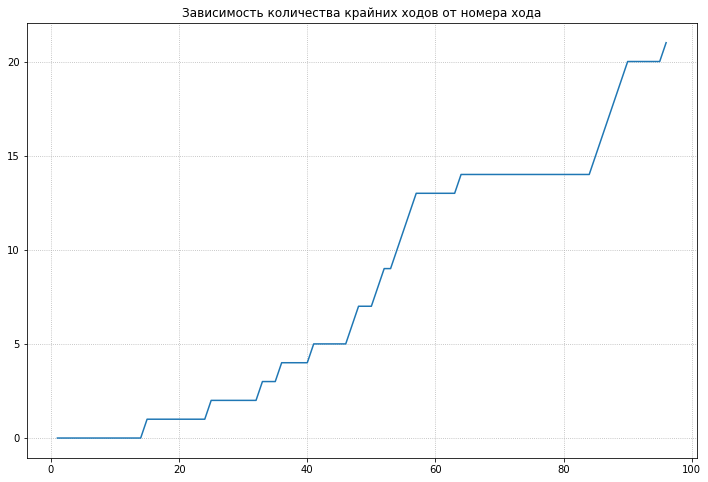

In [30]:
plt.figure(figsize=(12, 8))
plt.title('Зависимость количества крайних ходов от номера хода')
plt.plot(np.arange(1, 1 + len(marginal_moves)), marginal_moves)
plt.grid(ls=":")
plt.show()

In [6]:
def print_marg_moves_for_ratings(ratings, df):
    plt.figure(figsize=(12, 8))
    plt.title('Зависимость количества крайних ходов от номера хода')


    for rating in ratings:
        df_rat = df.loc[df['W_rating'] == rating]
        #print(df_rat)
        moves = []
        max_len = 0
        for i, row in df_rat.iterrows():
            #print(row['W_move'])
            moves.append(count_of_marginal_moves(row['W_move'].split()).tolist())
            max_len = max(max_len, len(moves[-1]))
        for i in range(len(moves)):
            count = max_len - len(moves[i])
            moves[i].extend(count*[moves[i][-1]])

        moves = np.array(moves).mean(axis=0)
        plt.plot(np.arange(1, 1 + len(moves)), moves, label=rating)
    plt.legend()
    plt.grid(ls=":")
    plt.show()

In [55]:
df.value_counts('W_rating')

W_rating
7d    1048
1d    1000
1k    1000
2d    1000
2k    1000
3d    1000
3k    1000
4d    1000
5d    1000
6d     505
dtype: int64

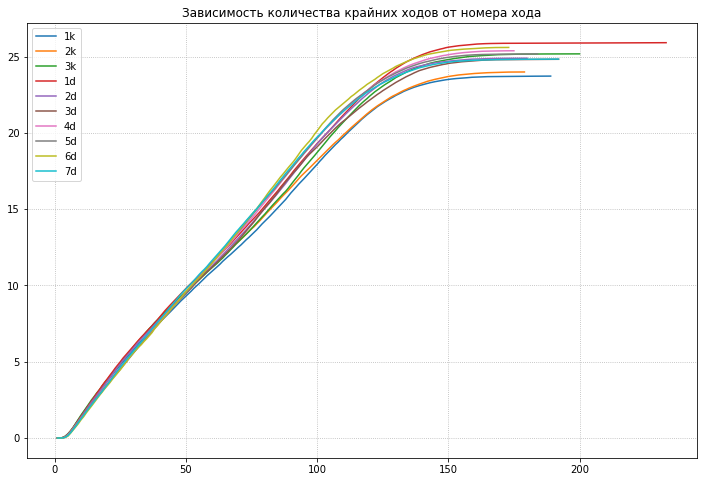

In [56]:
ratings = ['1k', '2k', '3k', '1d', '2d', '3d', '4d', '5d', '6d', '7d']
print_marg_moves_for_ratings(ratings, df)

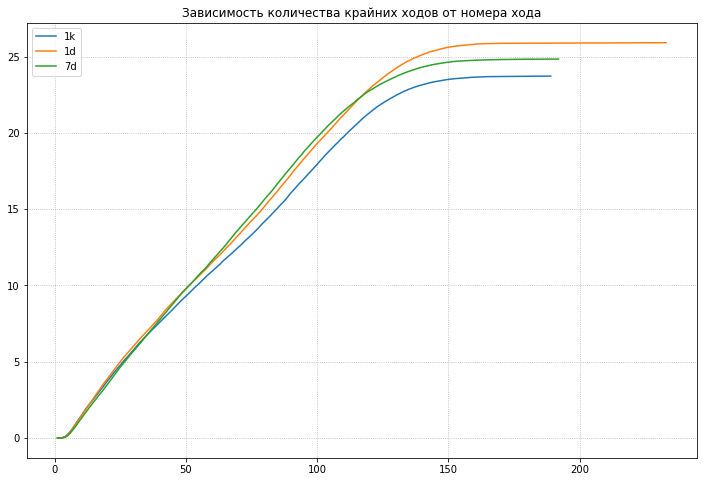

In [58]:
ratings = ['1k', '1d', '7d']
print_marg_moves_for_ratings(ratings, df)

**Вывод:**
* Средняя динамика количества крайних ходов особо не отличается от дана
* Имеет смысл для каждой отдельной партии определять йосе и уже после этого считать метрики по йосе, так как после усреднения по рейтингу получаем одинакову картину по всем данам

In [7]:
def print_marg_moves_for_games(df):
    plt.figure(figsize=(12, 8))
    plt.title('Зависимость количества крайних ходов от номера хода')


    moves = []
    max_len = 0
    for i, row in df.iterrows():
        moves = count_of_marginal_moves(row['W_move'].split())
        plt.plot(np.arange(1, 1 + len(moves)), moves, label=row['W_rating'])

    plt.legend()
    plt.grid(ls=":")
    plt.show()

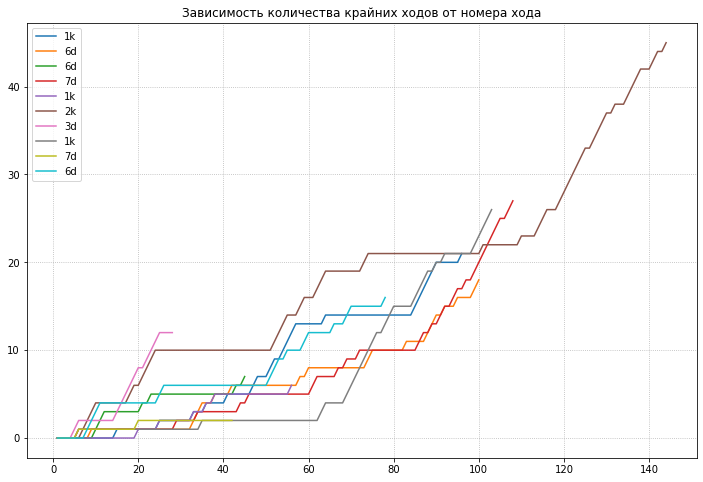

In [63]:
print_marg_moves_for_games(df[:10])

In [8]:
def get_stats_on_last_moves(row, n_moves, suff=None):
    sum_win = 0
    cnt_beautiful = 0
    cnt_beautifulS = 0
    winrate_delta = []
    
    moves_len = min(len(row['W_winrate']), len(row['B_winrate']))
    for i in range(max(moves_len - n_moves - 1, 0), moves_len):
        if (i != 0):
            winrate_delta.append(row['W_winrate'][i] - row['B_winrate'][i - 1])
            cnt_beautiful += int((row['W_winrate'][i] - row['B_winrate'][i - 1]) > 0)
            cnt_beautifulS += int((row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) > 0)
    row['mean_deltawinrate '+suff] = np.mean(winrate_delta)  
    row['beautiful_percent '+suff] = cnt_beautiful / (len(row['W_winrate']) - 1) 
    row['beautifulS_percent '+suff] = cnt_beautifulS / (len(row['W_winrate']) - 1) 
    sum_scoreLead = 0
    score_S = []
    scoreSelfplay = []
    utility = []
    for i in range(max(moves_len - n_moves - 1, 0), moves_len):
        if (i != 0):
            score_S.append(row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) 
            scoreSelfplay.append(row['W_scoreSelfplay'][i] - row['B_scoreSelfplay'][i - 1]) 
            utility.append(row['W_utility'][i] - row['B_utility'][i - 1]) 

    score_S.sort()
    winrate_delta.sort()

    row['mean_deltascoreLead '+suff] = np.mean(score_S)
    row['mean_deltaSelfPlay '+suff] = np.mean(scoreSelfplay)
    

    dispersy_scoreLead = 0
    for i in range(max(moves_len - n_moves - 1, 0), moves_len):
        if (i != 0):
            dispersy_scoreLead += (row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]\
                                   - row['mean_deltascoreLead '+suff]) ** 2
    row['dispersy_scoreLead '+suff] = dispersy_scoreLead / (n_moves - 1) 
    row['mean_utility '+suff] = np.mean(utility)
    
def add_last_moves_stats(df, n_moves, suff=None):
    if suff is None:
        suff = str(n_moves)
    df['mean_deltawinrate '+suff] = None 
    df['beautiful_percent '+suff] = None
    df['beautifulS_percent '+suff] = None
    df['mean_deltascoreLead '+suff] = None
    df['mean_deltaSelfPlay '+suff] = None
    df['dispersy_scoreLead '+suff] = None
    df['mean_utility '+suff] = None
    for i, row in tqdm(df.iterrows()):
        get_stats_on_last_moves(row, n_moves, suff)


def precalc_df(data):
    data['mean_deltawinrate'] = None
    data['mean_deltaScore50p'] = None
    data['mean_deltascoreLead'] = None
    data['dispersy_scoreLead'] = None
    data['beautiful_percent'] = None
    data['beautifulS_percent'] = None
    data['mean_utility'] = None
    data['Score25p'] = None
    data['Score75p'] = None
    data['Winrate25p'] = None
    data['Winrate75p'] = None
    data['mean_deltawinrate50p'] = None
    data['median_scorelead'] = None
    data['length'] = None
    data['chiselka'] = None
    data['mean_deltaSelfPlay'] = None

    for i, row in tqdm(data.iterrows()):
        row['W_scoreLead'] = [float(x) for x in row['W_scoreLead'].split()]
        row['B_scoreLead'] = [float(x) for x in row['B_scoreLead'].split()]
        row['W_scoreSelfplay'] = [float(x) for x in row['W_scoreSelfplay'].split()]
        row['B_scoreSelfplay'] = [float(x) for x in row['B_scoreSelfplay'].split()]
        row['W_scoreStdev'] = [float(x) for x in row['W_scoreStdev'].split()]
        row['B_scoreStdev'] = [float(x) for x in row['B_scoreStdev'].split()]
        row['W_utility'] = [float(x) for x in row['W_utility'].split()]
        row['B_utility'] = [float(x) for x in row['B_utility'].split()]
        row['W_winrate'] = [float(x) for x in row['W_winrate'].split()]
        row['B_winrate'] = [float(x) for x in row['B_winrate'].split()]
        row['length'] = len(row['W_winrate']) + len(row['B_winrate'])
        if (row['W_rating'][1] == 'k'):
            row['chiselka'] = -int(row['W_rating'][0]) + 1
        else:
            row['chiselka'] = int(row['W_rating'][0])
            
        sum_win = 0
        cnt_beautiful = 0
        cnt_beautifulS = 0
        winrate_delta = []
        for i in range(min(len(row['W_winrate']), len(row['B_winrate']))):
            if (i != 0):
                winrate_delta.append(row['W_winrate'][i] - row['B_winrate'][i - 1])
                cnt_beautiful += int((row['W_winrate'][i] - row['B_winrate'][i - 1]) > 0)
                cnt_beautifulS += int((row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) > 0)
        row['mean_deltawinrate'] = np.mean(winrate_delta)  
        row['beautiful_percent'] = cnt_beautiful / (len(row['W_winrate']) - 1) 
        row['beautifulS_percent'] = cnt_beautifulS / (len(row['W_winrate']) - 1) 
        sum_scoreLead = 0
        score_S = []
        scoreSelfplay = []
        utility = []
        for i in range(min(len(row['W_scoreLead']), len(row['B_winrate']))):
            if (i != 0):
                score_S.append(row['W_scoreLead'][i] - row['B_scoreLead'][i - 1]) 
                scoreSelfplay.append(row['W_scoreSelfplay'][i] - row['B_scoreSelfplay'][i - 1]) 
                utility.append(row['W_utility'][i] - row['B_utility'][i - 1]) 

        score_S.sort()
        winrate_delta.sort()

        row['Score25p'] = score_S[int(len(score_S) * 0.25)]
        row['Score75p'] = score_S[int(len(score_S) * 0.75)]

        row['Winrate25p'] = winrate_delta[int(len(score_S) * 0.25)]
        row['Winrate75p'] = winrate_delta[int(len(score_S) * 0.75)]


        row['median_scorelead'] =  score_S[int(len(score_S) * 0.5)] 
        row['mean_deltascoreLead'] = np.mean(score_S)
        row['mean_deltaSelfPlay'] = np.mean(scoreSelfplay)
        if (row['length'] > 4):
            row['mean_deltaScore50p'] = np.mean(score_S[int(len(score_S) * 0.25):int(len(score_S) * 0.75)])
            row['mean_deltawinrate50p'] = np.mean(winrate_delta[int(len(score_S) * 0.25):int(len(score_S) * 0.75)])
        else:
            row['mean_deltawinrate50p'] = 0
            row['mean_deltaScore50p'] = 0;

        dispersy_scoreLead = 0
        for i in range(min(len(row['W_scoreLead']), len(row['B_winrate']))):
            if (i != 0):
                dispersy_scoreLead += (row['W_scoreLead'][i] - row['B_scoreLead'][i - 1] -\
                                       row['mean_deltascoreLead']) ** 2
        row['dispersy_scoreLead'] = dispersy_scoreLead / (len(row['W_scoreLead']) - 1) 
        row['mean_utility'] = np.mean(utility)

In [5]:
precalc_df(df)
df

9553it [01:21, 117.53it/s]


,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,...,mean_utility,Score25p,Score75p,Winrate25p,Winrate75p,mean_deltawinrate50p,median_scorelead,length,chiselka,mean_deltaSelfPlay
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,"[0.259317905, 0.275272131, 0.34262374, 0.42036...","[0.269090086, 0.368879974, 0.313294873, 0.3241...","[0.612279892, 0.74496536, 0.798256159, 0.88925...","[0.659113407, 1.01974392, 0.845264435, 0.90329...","[19.0972146, 19.1262786, 19.1251674, 19.124599...","[18.9657594, 18.7349877, 19.0095144, 19.336942...",...,-0.005789,-1.315356,0.535419,-0.001493,0.003918,0.00013,-0.202724,193,0,-0.458476
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,"[-0.336228907, -0.451985866, -0.450503439, -0....","[-0.195299417, -0.0215474814, -0.0487820767, -...","[-0.605065703, -0.531611502, -0.457107723, -1....","[-0.401197761, 0.0677562729, -0.15006648, -0.2...","[18.9644117, 19.1280327, 19.729129, 19.3076018...","[18.9167735, 18.8883766, 19.0279104, 19.155481...",...,-0.104847,-2.959774,1.230954,-0.035192,0.0013,-0.007565,-0.690325,200,6,-2.358093
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,"[-0.349154681, -0.376801372, -0.545067012, -0....","[-0.195299417, -0.0768974274, -0.11955905, -0....","[-0.541930556, -0.330013216, -0.606374502, -1....","[-0.401197761, 0.0198039729, -0.197169349, -0....","[19.0330246, 18.9204502, 19.5971657, 19.158332...","[18.9167735, 18.6827555, 18.9741695, 18.919985...",...,-0.058709,-1.50621,-0.181502,-0.02293,-0.002413,-0.011525,-0.760914,90,6,-0.990979
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,"[-0.336228907, -0.295238197, -0.229173675, -0....","[-0.195299417, -0.0768974274, -0.0601286627, 0...","[-0.605065703, -0.410426706, -0.209649369, 0.0...","[-0.401197761, 0.0198039729, -0.110884048, 0.0...","[18.9644117, 18.9180193, 19.2165282, 19.165237...","[18.9167735, 18.6827555, 19.1083634, 18.713983...",...,-0.037931,-1.474927,0.942557,-0.090739,0.019415,-0.018728,-0.366192,217,7,-0.215411
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,"[0.177181661, 0.0912810862, -0.0124292076, 0.1...","[0.269090086, 0.368569434, 0.405650288, 0.4550...","[0.525753796, 0.459862649, 0.369735599, 0.5185...","[0.659113407, 0.956286132, 0.955671072, 0.9587...","[19.1001073, 19.0063469, 19.5573579, 19.510446...","[18.9657594, 18.8312248, 19.2703565, 19.473041...",...,-0.033198,-1.151494,0.814298,-0.046642,0.030533,-0.009909,-0.195103,113,0,-0.32107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9548,5d,5d,dd dp md pc ob pb qb qd rd ra sb gc cd ec fb f...,pd qp nq qf oc qc od nc rc rb nb kd cc dc eb e...,"[0.18786788, 0.0888703763, -0.0687427819, 0.13...","[0.225592554, 0.39786166, 0.302593857, 0.72879...","[0.440063834, 0.331433862, 0.196966603, 0.5109...","[0.595243096, 0.963890076, 0.780920267, 1.5035...","[18.9411434, 18.6885692, 19.2765611, 19.189947...","[18.9453784, 18.7263741, 19.0141612, 19.317579...",...,-0.075678,-2.410015,1.271379,-0.07422,0.002295,-0.016235,-0.862154,203,5,-0.649659
9549,4d,4d,dp dc ed cj cd ej ee pe md of nf pd qc rb rd p...,pc pp ce cn ch de bp eh ph oe ne me oc qb pb n...,"[0.175838917, 0.0344207883, 0.129063725, 0.131...","[0.225591511, 0.263788551, 0.416289717, 0.4561...","[0.404811949, 0.28579697, 0.472031385, 0.60521...","[0.595240831, 0.858567476, 0.950118184, 1.0261...","[19.0041517, 18.7846616, 18.9799256, 19.372818...","[18.9453785, 18.6755181, 19.3232301, 19.510719...",...,-0.130429,-6.346649,-0.191171,-0.089682,0.000526,-0.018756,-3.21548,173,4,-3.593646
9550,4d,4d,dq qp cm cr er gq hq cj fr ir jq hr oc lc od n...,dd qd do cq cp fp gp hp fq iq jr ip kq pe pc o...,"

In [83]:
add_last_moves_stats(df, 10, suff=None)
df.head()

9553it [00:10, 923.25it/s]


,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,...,mean_deltaSelfPlay 20,dispersy_scoreLead 20,mean_utility 20,mean_deltawinrate 10,beautiful_percent 10,beautifulS_percent 10,mean_deltascoreLead 10,mean_deltaSelfPlay 10,dispersy_scoreLead 10,mean_utility 10
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,"[0.259317905, 0.275272131, 0.34262374, 0.42036...","[0.269090086, 0.368879974, 0.313294873, 0.3241...","[0.612279892, 0.74496536, 0.798256159, 0.88925...","[0.659113407, 1.01974392, 0.845264435, 0.90329...","[19.0972146, 19.1262786, 19.1251674, 19.124599...","[18.9657594, 18.7349877, 19.0095144, 19.336942...",...,-1.346865,5.015348,0.007447,0.000121,0.052632,0.031579,-1.297609,-1.294768,7.057896,0.010016
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,"[-0.336228907, -0.451985866, -0.450503439, -0....","[-0.195299417, -0.0215474814, -0.0487820767, -...","[-0.605065703, -0.531611502, -0.457107723, -1....","[-0.401197761, 0.0677562729, -0.15006648, -0.2...","[18.9644117, 19.1280327, 19.729129, 19.3076018...","[18.9167735, 18.8883766, 19.0279104, 19.155481...",...,-0.262442,36.674161,-0.005032,-0.000397,0.040404,0.080808,1.655611,2.575887,30.030378,0.002445
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,"[-0.349154681, -0.376801372, -0.545067012, -0....","[-0.195299417, -0.0768974274, -0.11955905, -0....","[-0.541930556, -0.330013216, -0.606374502, -1....","[-0.401197761, 0.0198039729, -0.197169349, -0....","[19.0330246, 18.9204502, 19.5971657, 19.158332...","[18.9167735, 18.6827555, 18.9741695, 18.919985...",...,-0.452145,3.043893,-0.012886,-0.003207,0.022727,0.090909,-1.167016,-0.525305,5.679307,-0.008551
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,"[-0.336228907, -0.295238197, -0.229173675, -0....","[-0.195299417, -0.0768974274, -0.0601286627, 0...","[-0.605065703, -0.410426706, -0.209649369, 0.0...","[-0.401197761, 0.0198039729, -0.110884048, 0.0...","[18.9644117, 18.9180193, 19.2165282, 19.165237...","[18.9167735, 18.6827555, 19.1083634, 18.713983...",...,0.665486,10.295085,0.057108,0.000222,0.065421,0.028037,-0.764123,-0.675312,2.751201,-0.001657
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,"[0.177181661, 0.0912810862, -0.0124292076, 0.1...","[0.269090086, 0.368569434, 0.405650288, 0.4550...","[0.525753796, 0.459862649, 0.369735599, 0.5185...","[0.659113407, 0.956286132, 0.955671072, 0.9587...","[19.1001073, 19.0063469, 19.5573579, 19.510446...","[18.9657594, 18.8312248, 19.2703565, 19.473041...",...,0.523159,4.350642,0.046017,0.006526,0.109091,0.127273,0.437542,0.355454,6.123699,0.012973


In [9]:
def get_start_of_yose(margin_moves, no_change_count=5):
    '''
    Находим сколько последних ходов мы будем считать что это йосе
    
    Будем идти с конца по массиву количества ходов на краю, если в массиве no_change_count одинаковых чисел,
    то мы останавливаемся и говорим, что тут началось йосе
    '''
    no_change = 1
    ans = len(margin_moves)
    for i in range(len(margin_moves) - 2, -1, -1):
        if margin_moves[i] == margin_moves[i + 1]:
            no_change += 1
        else:
            no_change = 1
        if no_change >= no_change_count:
            ans = len(margin_moves) - i - 1
            break
    return ans
    
def add_yose_stats(df):
    suff = 'yose'
    df['mean_deltawinrate '+suff] = None 
    df['beautiful_percent '+suff] = None
    df['beautifulS_percent '+suff] = None
    df['mean_deltascoreLead '+suff] = None
    df['mean_deltaSelfPlay '+suff] = None
    df['dispersy_scoreLead '+suff] = None
    df['mean_utility '+suff] = None
    for i, row in tqdm(df.iterrows()):
        marginal_moves = count_of_marginal_moves(row['W_move'].split())
        n_moves = get_start_of_yose(marginal_moves, 10)
        get_stats_on_last_moves(row, n_moves, suff)

In [7]:
add_yose_stats(df)
df

9553it [00:28, 337.64it/s]


,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,...,length,chiselka,mean_deltaSelfPlay,mean_deltawinrate yose,beautiful_percent yose,beautifulS_percent yose,mean_deltascoreLead yose,mean_deltaSelfPlay yose,dispersy_scoreLead yose,mean_utility yose
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,"[0.259317905, 0.275272131, 0.34262374, 0.42036...","[0.269090086, 0.368879974, 0.313294873, 0.3241...","[0.612279892, 0.74496536, 0.798256159, 0.88925...","[0.659113407, 1.01974392, 0.845264435, 0.90329...","[19.0972146, 19.1262786, 19.1251674, 19.124599...","[18.9657594, 18.7349877, 19.0095144, 19.336942...",...,193,0,-0.458476,0.000238,0.157895,0.084211,-1.196777,-1.253017,4.87921,0.007694
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,"[-0.336228907, -0.451985866, -0.450503439, -0....","[-0.195299417, -0.0215474814, -0.0487820767, -...","[-0.605065703, -0.531611502, -0.457107723, -1....","[-0.401197761, 0.0677562729, -0.15006648, -0.2...","[18.9644117, 19.1280327, 19.729129, 19.3076018...","[18.9167735, 18.8883766, 19.0279104, 19.155481...",...,200,6,-2.358093,-0.07672,0.191919,0.141414,-6.690418,-5.443901,280.327335,-0.168845
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,"[-0.349154681, -0.376801372, -0.545067012, -0....","[-0.195299417, -0.0768974274, -0.11955905, -0....","[-0.541930556, -0.330013216, -0.606374502, -1....","[-0.401197761, 0.0198039729, -0.197169349, -0....","[19.0330246, 18.9204502, 19.5971657, 19.158332...","[18.9167735, 18.6827555, 18.9741695, 18.919985...",...,90,6,-0.990979,-0.005614,0.022727,0.090909,-1.199993,-0.584082,4.706186,-0.0136
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,"[-0.336228907, -0.295238197, -0.229173675, -0....","[-0.195299417, -0.0768974274, -0.0601286627, 0...","[-0.605065703, -0.410426706, -0.209649369, 0.0...","[-0.401197761, 0.0198039729, -0.110884048, 0.0...","[18.9644117, 18.9180193, 19.2165282, 19.165237...","[18.9167735, 18.6827555, 19.1083634, 18.713983...",...,217,7,-0.215411,-0.000048,0.17757,0.130841,0.402745,0.266169,16.719448,0.001576
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,"[0.177181661, 0.0912810862, -0.0124292076, 0.1...","[0.269090086, 0.368569434, 0.405650288, 0.4550...","[0.525753796, 0.459862649, 0.369735599, 0.5185...","[0.659113407, 0.956286132, 0.955671072, 0.9587...","[19.1001073, 19.0063469, 19.5573579, 19.510446...","[18.9657594, 18.8312248, 19.2703565, 19.473041...",...,113,0,-0.32107,0.006526,0.109091,0.127273,0.437542,0.355454,6.123699,0.012973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9548,5d,5d,dd dp md pc ob pb qb qd rd ra sb gc cd ec fb f...,pd qp nq qf oc qc od nc rc rb nb kd cc dc eb e...,"[0.18786788, 0.0888703763, -0.0687427819, 0.13...","[0.225592554, 0.39786166, 0.302593857, 0.72879...","[0.440063834, 0.331433862, 0.196966603, 0.5109...","[0.595243096, 0.963890076, 0.780920267, 1.5035...","[18.9411434, 18.6885692, 19.2765611, 19.189947...","[18.9453784, 18.7263741, 19.0141612, 19.317579...",...,203,5,-0.649659,-0.008107,0.28,0.2,-0.660072,0.378952,42.806969,-0.014252
9549,4d,4d,dp dc ed cj cd ej ee pe md of nf pd qc rb rd p...,pc pp ce cn ch de bp eh ph oe ne me oc qb pb n...,"[0.175838917, 0.0344207883, 0.129063725, 0.131...","[0.225591511, 0.263788551, 0.416289717, 0.4561...","[0.404811949, 0.28579697, 0.472031385, 0.60521...","[0.595240831, 0.858567476, 0.950118184, 1.0261...","[19.0041517, 18.7846616, 18.9799256, 19.372818...","[18.9453785, 18.6755181, 19.3232301, 19.510719...",...,173,4,-3.593646,-0.000163,0.082353,0.0,-10.312958,-7.77216,31.080104,-0.019032
9550,4d,4d,dq qp cm cr er gq hq cj fr ir jq hr oc lc od n...,dd qd d

In [9]:
aggreg = df.groupby(['chiselka']).agg({'mean_deltawinrate yose' : 'mean',
                                         'mean_deltascoreLead yose': 'mean',
                                         'dispersy_scoreLead yose' : 'mean', 
                                        'beautiful_percent yose': 'mean',
                                         'mean_utility yose' : 'mean',
                                         'beautifulS_percent yose': 'mean',
                                         'mean_deltaSelfPlay yose' : 'mean'})
aggreg

,mean_deltawinrate yose,mean_deltascoreLead yose,dispersy_scoreLead yose,beautiful_percent yose,mean_utility yose,beautifulS_percent yose,mean_deltaSelfPlay yose
chiselka,,,,,,,
-2,-0.022870,-2.922422,82.732341,0.161252,-0.050497,0.120211,-2.681951
-1,-0.021910,-2.651187,75.830742,0.159964,-0.048072,0.124056,-2.423293
0,-0.023334,-2.586634,76.907478,0.159754,-0.051198,0.122332,-2.368497
1,-0.024246,-2.614235,72.241664,0.162206,-0.052850,0.125503,-2.397559
2,-0.027661,-2.970809,89.493623,0.178671,-0.060687,0.105745,-2.382678
3,-0.025199,-2.498699,64.039220,0.170735,-0.054896,0.106480,-1.950666
4,-0.024960,-2.404416,74.789582,0.177755,-0.054363,0.106010,-1.967855
5,-0.024314,-2.382141,76.989261,0.172301,-0.052786,0.108358,-1.934732
6,-0.019767,-1.900911,55.311780,0.172436,-0.042741,0.115045,-1.478534


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


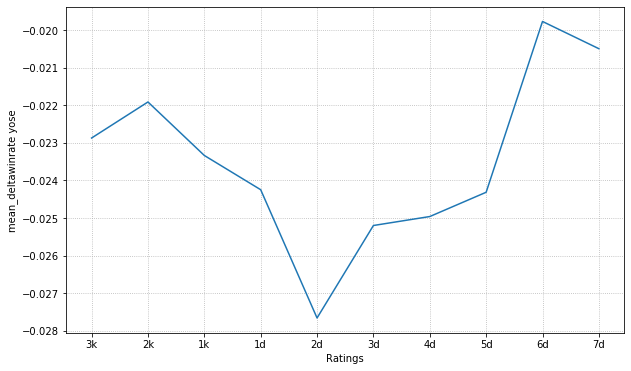

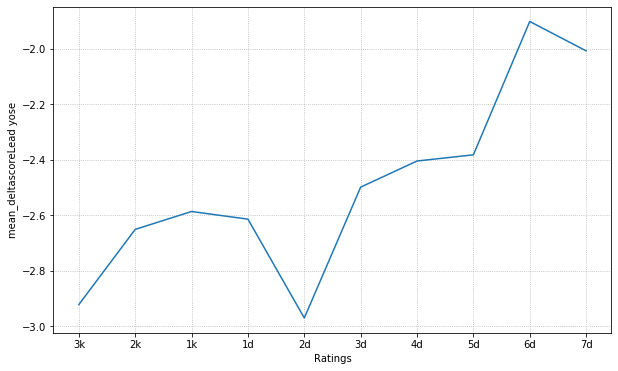

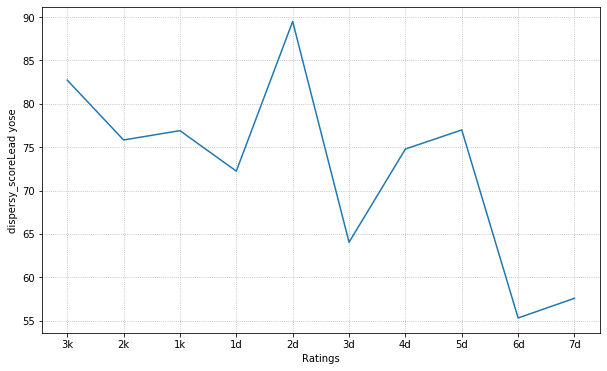

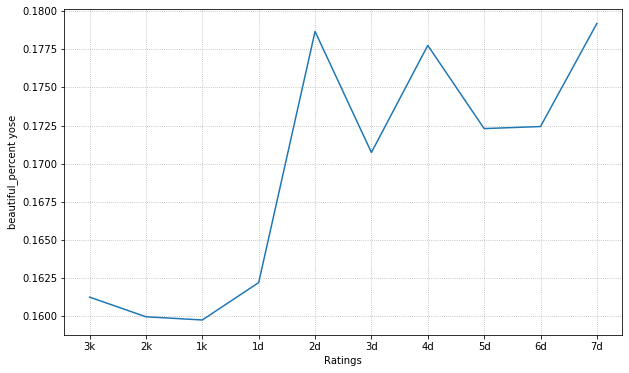

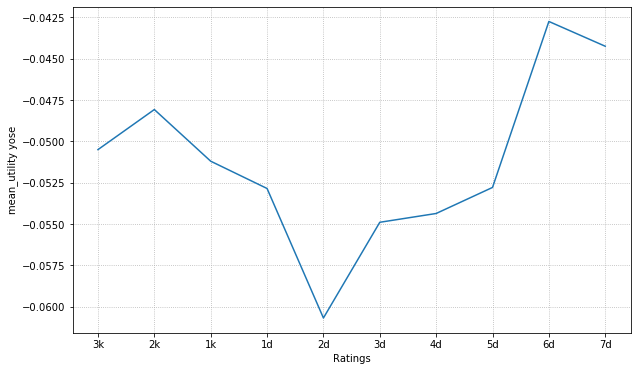

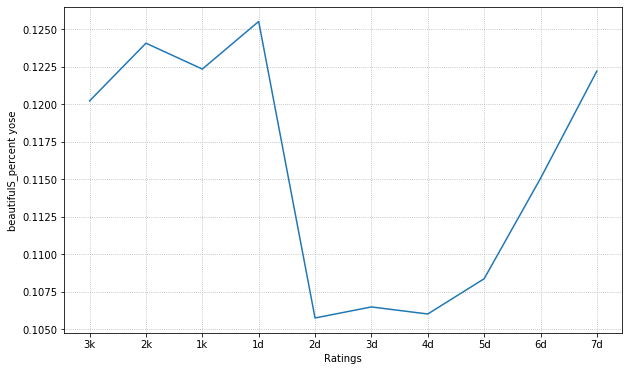

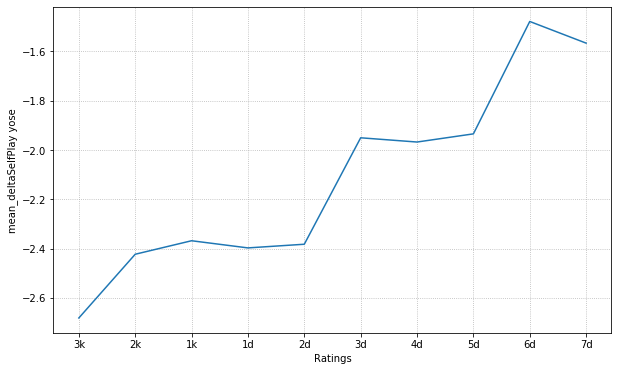

In [10]:
yose_features = ['mean_deltawinrate yose', 'mean_deltascoreLead yose', 'dispersy_scoreLead yose', 
                    'beautiful_percent yose', 'mean_utility yose', 'beautifulS_percent yose',
                    'mean_deltaSelfPlay yose']
ranks = ["3k", "2k", "1k", "1d", "2d", "3d", "4d", "5d", "6d", "7d"]

for feature in yose_features:
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, aggreg[feature], label = "Среднее убывания счета после хода")
    plt.ylabel(feature)
    plt.xlabel('Ratings')
    plt.grid(ls=':')
    plt.show()

**Вывод:**
* Некая зависимость от ранга у метрик в йосе присутствует, однако есть некоторые непонятные провалы, возможно данные не очень хорошие

### Локальность ходов

In [14]:
ord('b') - ord('a')

1

In [10]:
def delta_moves(a, b):
    return abs(ord(a[0]) - ord(b[0])) + abs(ord(a[1]) - ord(b[1]))

def get_distance_of_moves(moves):
    ans = np.zeros(len(moves) - 1)
    for i in range(1, len(moves)):
        ans[i - 1] = delta_moves(moves[i], moves[i - 1])
    return ans

In [16]:
moves = df[:1]
moves = moves['W_move']
moves1 = moves[0].split()
dist = get_distance_of_moves(moves1)

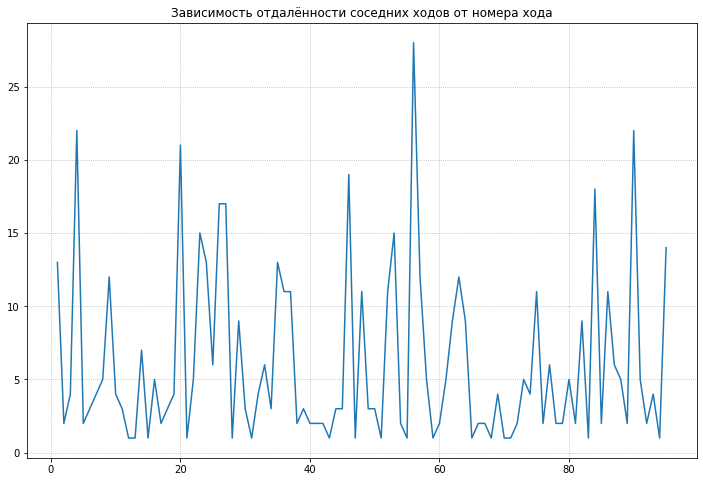

In [17]:
plt.figure(figsize=(12, 8))
plt.title('Зависимость отдалённости соседних ходов от номера хода')
plt.plot(np.arange(1, 1 + len(dist)), dist)
plt.grid(ls=":")
plt.show()

In [11]:
def print_dist_for_ratings(ratings, df):
    plt.figure(figsize=(12, 8))
    plt.title('Зависимость расстояния между соседними ходами от номера хода')


    for rating in ratings:
        df_rat = df.loc[df['W_rating'] == rating]
        #print(df_rat)
        moves = []
        max_len = 0
        for i, row in df_rat.iterrows():
            #print(row['W_move'])
            moves.append(get_distance_of_moves(row['W_move'].split()).tolist())
            max_len = max(max_len, len(moves[-1]))
        for i in range(len(moves)):
            count = max_len - len(moves[i])
            moves[i].extend(count*[moves[i][-1]])

        moves = np.array(moves).mean(axis=0)
        plt.plot(np.arange(1, 1 + len(moves)), moves, label=rating)
    plt.legend()
    plt.grid(ls=":")
    plt.show()

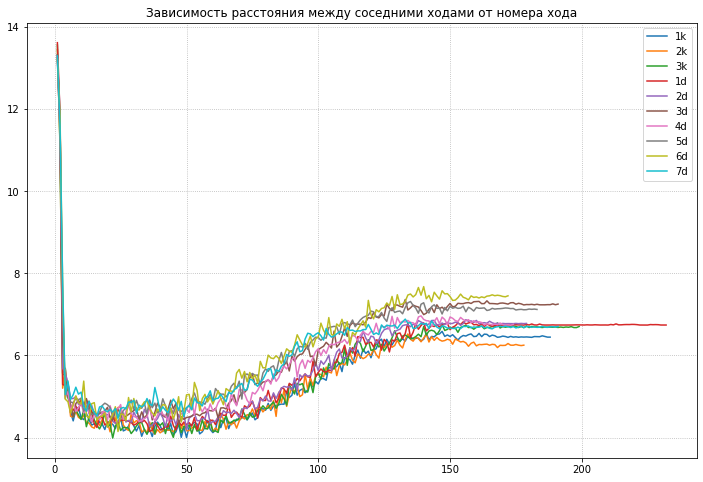

In [22]:
ratings = ['1k', '2k', '3k', '1d', '2d', '3d', '4d', '5d', '6d', '7d']
print_dist_for_ratings(ratings, df)

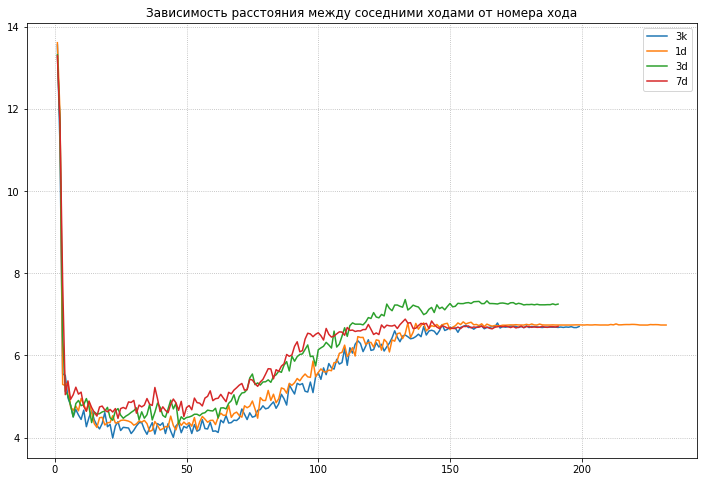

In [24]:
ratings = ['3k', '1d', '3d', '7d']
print_dist_for_ratings(ratings, df)

**Вывод:**
* Строгая градация по рейтингу и среднему расстоянию наблюдается где-то в середине партии - чем больше рейтинг, тем больше расстояние между соседними ходами

In [12]:
def add_dist_stats_to_row(row):
    dist = get_distance_of_moves(row['W_move'].split())
    row['mean_dist'] = np.mean(dist)
    row['dispersy_dist'] = np.var(dist)

def add_dist_stats(df):
    df['mean_dist'] = None 
    df['dispersy_dist'] = None
    for i, row in tqdm(df.iterrows()):
        add_dist_stats_to_row(row)

In [26]:
add_dist_stats(df)
df.head()

9553it [00:02, 3614.58it/s]


,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,...,mean_deltaSelfPlay,mean_deltawinrate yose,beautiful_percent yose,beautifulS_percent yose,mean_deltascoreLead yose,mean_deltaSelfPlay yose,dispersy_scoreLead yose,mean_utility yose,mean_dist,dispersy_dist
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,"[0.259317905, 0.275272131, 0.34262374, 0.42036...","[0.269090086, 0.368879974, 0.313294873, 0.3241...","[0.612279892, 0.74496536, 0.798256159, 0.88925...","[0.659113407, 1.01974392, 0.845264435, 0.90329...","[19.0972146, 19.1262786, 19.1251674, 19.124599...","[18.9657594, 18.7349877, 19.0095144, 19.336942...",...,-0.458476,0.000238,0.157895,0.084211,-1.196777,-1.253017,4.87921,0.007694,6.084211,34.771856
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,"[-0.336228907, -0.451985866, -0.450503439, -0....","[-0.195299417, -0.0215474814, -0.0487820767, -...","[-0.605065703, -0.531611502, -0.457107723, -1....","[-0.401197761, 0.0677562729, -0.15006648, -0.2...","[18.9644117, 19.1280327, 19.729129, 19.3076018...","[18.9167735, 18.8883766, 19.0279104, 19.155481...",...,-2.358093,-0.07672,0.191919,0.141414,-6.690418,-5.443901,280.327335,-0.168845,5.151515,18.936639
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,"[-0.349154681, -0.376801372, -0.545067012, -0....","[-0.195299417, -0.0768974274, -0.11955905, -0....","[-0.541930556, -0.330013216, -0.606374502, -1....","[-0.401197761, 0.0198039729, -0.197169349, -0....","[19.0330246, 18.9204502, 19.5971657, 19.158332...","[18.9167735, 18.6827555, 18.9741695, 18.919985...",...,-0.990979,-0.005614,0.022727,0.090909,-1.199993,-0.584082,4.706186,-0.0136,5.704545,26.071798
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,"[-0.336228907, -0.295238197, -0.229173675, -0....","[-0.195299417, -0.0768974274, -0.0601286627, 0...","[-0.605065703, -0.410426706, -0.209649369, 0.0...","[-0.401197761, 0.0198039729, -0.110884048, 0.0...","[18.9644117, 18.9180193, 19.2165282, 19.165237...","[18.9167735, 18.6827555, 19.1083634, 18.713983...",...,-0.215411,-0.000048,0.17757,0.130841,0.402745,0.266169,16.719448,0.001576,5.607477,30.032841
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,"[0.177181661, 0.0912810862, -0.0124292076, 0.1...","[0.269090086, 0.368569434, 0.405650288, 0.4550...","[0.525753796, 0.459862649, 0.369735599, 0.5185...","[0.659113407, 0.956286132, 0.955671072, 0.9587...","[19.1001073, 19.0063469, 19.5573579, 19.510446...","[18.9657594, 18.8312248, 19.2703565, 19.473041...",...,-0.32107,0.006526,0.109091,0.127273,0.437542,0.355454,6.123699,0.012973,4.545455,16.647934


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


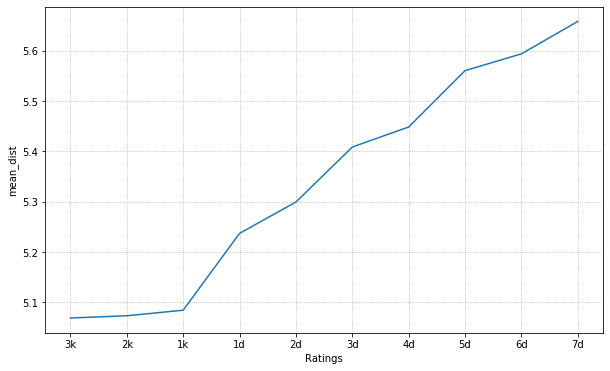

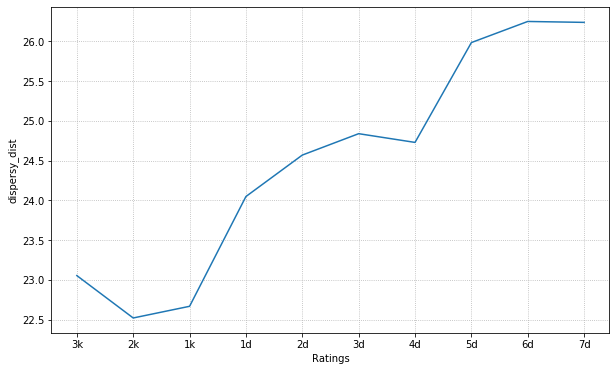

In [27]:
aggreg = df.groupby(['chiselka']).agg({'mean_dist' : 'mean', 'dispersy_dist' : 'mean'})

yose_features = ['mean_dist', 'dispersy_dist']
ranks = ["3k", "2k", "1k", "1d", "2d", "3d", "4d", "5d", "6d", "7d"]

for feature in yose_features:
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, aggreg[feature])
    plt.ylabel(feature)
    plt.xlabel('Ratings')
    plt.grid(ls=':')
    plt.show()

Сохраним таблицу только с нашими фичами 

In [28]:
df = pd.read_csv('../../data/data_p1.csv')
precalc_df(df)
add_last_moves_stats(df, 10, suff=None)
add_last_moves_stats(df, 20, suff=None)
add_yose_stats(df)
add_dist_stats(df)
df.head()

9553it [01:20, 118.39it/s]
9553it [00:10, 898.56it/s]
9553it [00:17, 531.23it/s]
9553it [00:29, 326.93it/s]
9553it [00:02, 3664.07it/s]


,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,...,mean_utility 20,mean_deltawinrate yose,beautiful_percent yose,beautifulS_percent yose,mean_deltascoreLead yose,mean_deltaSelfPlay yose,dispersy_scoreLead yose,mean_utility yose,mean_dist,dispersy_dist
0,1k,1k,pp cp dq cn qf pg qe og qj lq pq qo qn qm or o...,pd dd eq ep hq pf of qd nd nq qq qp ro rn pr q...,"[0.259317905, 0.275272131, 0.34262374, 0.42036...","[0.269090086, 0.368879974, 0.313294873, 0.3241...","[0.612279892, 0.74496536, 0.798256159, 0.88925...","[0.659113407, 1.01974392, 0.845264435, 0.90329...","[19.0972146, 19.1262786, 19.1251674, 19.124599...","[18.9657594, 18.7349877, 19.0095144, 19.336942...",...,0.007447,0.000238,0.157895,0.084211,-1.196777,-1.253017,4.87921,0.007694,6.084211,34.771856
1,6d,6d,pd cd nc jq mq kq qo po rp pp pm lp ko jo lq p...,dp pq qf qk gq kp np qp nq rq qq mr lo kn mp l...,"[-0.336228907, -0.451985866, -0.450503439, -0....","[-0.195299417, -0.0215474814, -0.0487820767, -...","[-0.605065703, -0.531611502, -0.457107723, -1....","[-0.401197761, 0.0677562729, -0.15006648, -0.2...","[18.9644117, 19.1280327, 19.729129, 19.3076018...","[18.9167735, 18.8883766, 19.0279104, 19.155481...",...,-0.005032,-0.07672,0.191919,0.141414,-6.690418,-5.443901,280.327335,-0.168845,5.151515,18.936639
2,6d,5d,pp dd qn nc qc qd qf pe qe rb rg rh md jc lc l...,pd cp nq jp qg pc qb pf oe of pb qh qi nd mc m...,"[-0.349154681, -0.376801372, -0.545067012, -0....","[-0.195299417, -0.0768974274, -0.11955905, -0....","[-0.541930556, -0.330013216, -0.606374502, -1....","[-0.401197761, 0.0198039729, -0.197169349, -0....","[19.0330246, 18.9204502, 19.5971657, 19.158332...","[18.9167735, 18.6827555, 18.9741695, 18.919985...",...,-0.012886,-0.005614,0.022727,0.090909,-1.199993,-0.584082,4.706186,-0.0136,5.704545,26.071798
3,7d,7d,pp cd ec dc cf bg qj oj pn pq qf pe oe pg qg p...,dp pd ed fc gd de nc qh nq qq pr pf qe qd of o...,"[-0.336228907, -0.295238197, -0.229173675, -0....","[-0.195299417, -0.0768974274, -0.0601286627, 0...","[-0.605065703, -0.410426706, -0.209649369, 0.0...","[-0.401197761, 0.0198039729, -0.110884048, 0.0...","[18.9644117, 18.9180193, 19.2165282, 19.165237...","[18.9167735, 18.6827555, 19.1083634, 18.713983...",...,0.057108,-0.000048,0.17757,0.130841,0.402745,0.266169,16.719448,0.001576,5.607477,30.032841
4,1k,1k,dd pc ch fc cc eh gh hi dk cl cm cn ej dl fj f...,pp cp cf ef bd cj gf hh hg ck bl bm dj ek ei d...,"[0.177181661, 0.0912810862, -0.0124292076, 0.1...","[0.269090086, 0.368569434, 0.405650288, 0.4550...","[0.525753796, 0.459862649, 0.369735599, 0.5185...","[0.659113407, 0.956286132, 0.955671072, 0.9587...","[19.1001073, 19.0063469, 19.5573579, 19.510446...","[18.9657594, 18.8312248, 19.2703565, 19.473041...",...,0.046017,0.006526,0.109091,0.127273,0.437542,0.355454,6.123699,0.012973,4.545455,16.647934


In [29]:
df.columns

Index(['W_rating', 'B_rating', 'W_move', 'B_move', 'W_scoreLead',
       'B_scoreLead', 'W_scoreSelfplay', 'B_scoreSelfplay', 'W_scoreStdev',
       'B_scoreStdev', 'W_utility', 'B_utility', 'W_visits', 'B_visits',
       'W_winrate', 'B_winrate', 'mean_deltawinrate', 'mean_deltaScore50p',
       'mean_deltascoreLead', 'dispersy_scoreLead', 'beautiful_percent',
       'beautifulS_percent', 'mean_utility', 'Score25p', 'Score75p',
       'Winrate25p', 'Winrate75p', 'mean_deltawinrate50p', 'median_scorelead',
       'length', 'chiselka', 'mean_deltaSelfPlay', 'mean_deltawinrate 10',
       'beautiful_percent 10', 'beautifulS_percent 10',
       'mean_deltascoreLead 10', 'mean_deltaSelfPlay 10',
       'dispersy_scoreLead 10', 'mean_utility 10', 'mean_deltawinrate 20',
       'beautiful_percent 20', 'beautifulS_percent 20',
       'mean_deltascoreLead 20', 'mean_deltaSelfPlay 20',
       'dispersy_scoreLead 20', 'mean_utility 20', 'mean_deltawinrate yose',
       'beautiful_percent yose', 

In [30]:
features = ['W_rating', 'B_rating', 'mean_deltawinrate', 'mean_deltaScore50p',
       'mean_deltascoreLead', 'dispersy_scoreLead', 'beautiful_percent',
       'beautifulS_percent', 'mean_utility', 'Score25p', 'Score75p',
       'Winrate25p', 'Winrate75p', 'mean_deltawinrate50p', 'median_scorelead',
       'length', 'chiselka', 'mean_deltaSelfPlay', 'mean_deltawinrate 10',
       'beautiful_percent 10', 'beautifulS_percent 10',
       'mean_deltascoreLead 10', 'mean_deltaSelfPlay 10',
       'dispersy_scoreLead 10', 'mean_utility 10', 'mean_deltawinrate 20',
       'beautiful_percent 20', 'beautifulS_percent 20',
       'mean_deltascoreLead 20', 'mean_deltaSelfPlay 20',
       'dispersy_scoreLead 20', 'mean_utility 20', 'mean_deltawinrate yose',
       'beautiful_percent yose', 'beautifulS_percent yose',
       'mean_deltascoreLead yose', 'mean_deltaSelfPlay yose',
       'dispersy_scoreLead yose', 'mean_utility yose', 'mean_dist',
       'dispersy_dist']

In [32]:
df_feat = df[features].copy()
df_feat.head()

,W_rating,B_rating,mean_deltawinrate,mean_deltaScore50p,mean_deltascoreLead,dispersy_scoreLead,beautiful_percent,beautifulS_percent,mean_utility,Score25p,...,mean_utility 20,mean_deltawinrate yose,beautiful_percent yose,beautifulS_percent yose,mean_deltascoreLead yose,mean_deltaSelfPlay yose,dispersy_scoreLead yose,mean_utility yose,mean_dist,dispersy_dist
0,1k,1k,-0.002813,-0.250119,-0.415523,2.891406,0.568421,0.463158,-0.005789,-1.315356,...,0.007447,0.000238,0.157895,0.084211,-1.196777,-1.253017,4.87921,0.007694,6.084211,34.771856
1,6d,6d,-0.049091,-0.83993,-2.673042,112.270145,0.434343,0.393939,-0.104847,-2.959774,...,-0.005032,-0.07672,0.191919,0.141414,-6.690418,-5.443901,280.327335,-0.168845,5.151515,18.936639
2,6d,5d,-0.027731,-0.808601,-1.027004,1.910735,0.113636,0.204545,-0.058709,-1.50621,...,-0.012886,-0.005614,0.022727,0.090909,-1.199993,-0.584082,4.706186,-0.0136,5.704545,26.071798
3,7d,7d,-0.018797,-0.366425,-0.092835,7.876331,0.420561,0.392523,-0.037931,-1.474927,...,0.057108,-0.000048,0.17757,0.130841,0.402745,0.266169,16.719448,0.001576,5.607477,30.032841
4,1k,1k,-0.01663,-0.242945,-0.199697,2.967423,0.381818,0.4,-0.033198,-1.151494,...,0.046017,0.006526,0.109091,0.127273,0.437542,0.355454,6.123699,0.012973,4.545455,16.647934


In [33]:
df_feat.to_csv('../../data/data_p1_features.csv')

In [14]:
df = pd.read_csv('../../data/data_p1_jap.csv')
df.value_counts('B_rating')

B_rating
5d     1005
4d     1005
3d     1003
2d      996
6d      994
2k      988
7d      986
1k      984
1d      979
3k      974
18k      28
9k       11
8d        8
5k        6
4k        5
6k        5
15k       4
10k       4
17k       3
13k       3
8k        3
14k       2
11k       1
16k       1
7k        1
9d        1
dtype: int64

In [17]:
df['W_rating'] = np.where(df['W_rating'] == 'N', '2k', df['W_rating'])
df.value_counts('W_rating')

W_rating
1d    1000
1k    1000
2d    1000
2k    1000
3d    1000
3k    1000
4d    1000
5d    1000
6d    1000
7d    1000
dtype: int64

In [18]:
df = pd.read_csv('../../data/data_p1_jap.csv')
df['W_rating'] = np.where(df['W_rating'] == 'N', '2k', df['W_rating'])
df.value_counts('W_rating')
precalc_df(df)
add_last_moves_stats(df, 10, suff=None)
add_last_moves_stats(df, 20, suff=None)
add_yose_stats(df)
add_dist_stats(df)
df.head()

10000it [01:25, 117.11it/s]
10000it [00:10, 930.71it/s]
10000it [00:19, 519.20it/s]
10000it [00:31, 314.21it/s]
10000it [00:02, 3711.74it/s]


,W_rating,B_rating,W_move,B_move,W_scoreLead,B_scoreLead,W_scoreSelfplay,B_scoreSelfplay,W_scoreStdev,B_scoreStdev,...,mean_utility 20,mean_deltawinrate yose,beautiful_percent yose,beautifulS_percent yose,mean_deltascoreLead yose,mean_deltaSelfPlay yose,dispersy_scoreLead yose,mean_utility yose,mean_dist,dispersy_dist
0,3k,3k,dd qd co ep fp gp hp bo dp dn dj ch fd fh gf g...,dq pp cf cm eq fq gq cp bp hq dm en ef bd ek f...,"[-0.214067336, -0.263641339, -0.503190875, -0....","[-0.195299417, -0.0976613089, -0.111609682, -0...","[-0.334617998, -0.300577886, -0.630800009, -0....","[-0.401197761, -0.0959409401, -0.2717852, -0.4...","[18.88932, 19.0870779, 19.8351023, 19.3669123,...","[18.9167735, 18.5494601, 19.1351328, 19.198463...",...,-0.000262,0.00026,0.226667,0.073333,-2.5734,-2.146336,10.538134,-0.004645,5.213333,20.514489
1,3k,3k,dp dd fp fo dq dn oq lq mr mq nn pm on mn pk p...,pd pq fq gp eq jq qo pp lr kr pr nl no mo lo q...,"[-0.365694046, -0.450503141, -0.500125229, -0....","[-0.195299417, -0.0215474814, -0.0475164652, -...","[-0.544929922, -0.453790933, -0.50780201, 0.00...","[-0.401197761, 0.0677562729, -0.145525753, -0....","[18.9764713, 19.2464677, 19.4440768, 18.904032...","[18.9167735, 18.8883766, 19.1903905, 18.874345...",...,-0.087056,-0.043191,0.375,0.1875,-0.753123,-1.022411,1.47267,-0.087056,4.625,19.234375
2,3k,3k,qp cd mq op oo nq qq po pn rr qn or,dp pd oq on np no pq pp qo qr pm ro,"[-0.336228907, -0.10799592, -0.168281004, 0.03...","[-0.195299417, 0.0400544852, 0.197082505, 0.35...","[-0.605065703, -0.0212804843, -0.0606180802, 0...","[-0.401197761, 0.0816460997, 0.327596337, 0.65...","[18.9644117, 19.007575, 19.1019456, 19.2652356...","[18.9167735, 18.884631, 19.2254874, 19.5612501...",...,-0.188092,-0.089254,0.272727,0.090909,-2.458237,-2.900573,7.3926,-0.188092,7.272727,68.92562
3,3k,3k,dp dc qo cb bc ab ba bd ad qq rq pp op qf of q...,pd pq de cc cd bb db ec be mc qr rr oq nq qe r...,"[-0.349154681, -0.395409286, -0.357516617, -0....","[-0.195299417, -0.0360237695, -0.0860090628, -...","[-0.541930556, -0.411005855, -0.409849942, -0....","[-0.401197761, 0.0877044871, -0.209650844, -0....","[19.0330246, 19.2538969, 19.2066255, 19.689415...","[18.9167735, 18.8980895, 19.2010651, 19.112166...",...,0.030994,-0.066028,0.169118,0.088235,-9.081688,-7.362831,575.227179,-0.149602,5.845588,45.512922
4,3k,3k,dp dd eq dn nc qc pc rd rc md gc qn qq pq rp r...,pd pp fq fp jp lc qd od re qf ic ke ql qp op r...,"[-0.349154681, -0.257532973, -0.47173512, -0.2...","[-0.195299417, -0.0428321809, -0.0887586847, -...","[-0.541930556, -0.357352473, -0.542812169, -0....","[-0.401197761, -0.0164186358, -0.186379865, -0...","[19.0330246, 19.0563715, 19.2979291, 19.579215...","[18.9167735, 18.7107321, 19.0650203, 19.147219...",...,-0.175444,-0.087452,0.046512,0.046512,-5.938662,-5.755159,47.043784,-0.200001,5.55814,29.176852


In [19]:
features = ['W_rating', 'B_rating', 'mean_deltawinrate', 'mean_deltaScore50p',
       'mean_deltascoreLead', 'dispersy_scoreLead', 'beautiful_percent',
       'beautifulS_percent', 'mean_utility', 'Score25p', 'Score75p',
       'Winrate25p', 'Winrate75p', 'mean_deltawinrate50p', 'median_scorelead',
       'length', 'chiselka', 'mean_deltaSelfPlay', 'mean_deltawinrate 10',
       'beautiful_percent 10', 'beautifulS_percent 10',
       'mean_deltascoreLead 10', 'mean_deltaSelfPlay 10',
       'dispersy_scoreLead 10', 'mean_utility 10', 'mean_deltawinrate 20',
       'beautiful_percent 20', 'beautifulS_percent 20',
       'mean_deltascoreLead 20', 'mean_deltaSelfPlay 20',
       'dispersy_scoreLead 20', 'mean_utility 20', 'mean_deltawinrate yose',
       'beautiful_percent yose', 'beautifulS_percent yose',
       'mean_deltascoreLead yose', 'mean_deltaSelfPlay yose',
       'dispersy_scoreLead yose', 'mean_utility yose', 'mean_dist',
       'dispersy_dist']
df_feat = df[features].copy()
df_feat.head()
df_feat.to_csv('../../data/data_p1_jap_features.csv')